In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sADF=pd.read_csv(r"C:\Users\Hasib\OneDrive - University of Calgary\PIMS M2PI Workshop 2022\Novion GI\Site A - Tue Feb 15 2022 to Thu Jun 30 2022.csv")
sBDF=pd.read_csv(r"C:\Users\Hasib\OneDrive - University of Calgary\PIMS M2PI Workshop 2022\Novion GI\Site B - Tue Feb 15 2022 to Thu Jun 30 2022.csv")

In [4]:
sADF.head()

,Timestamp,Water Level [m]
0,2022-02-15 5:05:00 p.m.,0.238
1,2022-02-15 5:10:00 p.m.,0.237
2,2022-02-15 5:15:00 p.m.,0.236
3,2022-02-15 5:20:00 p.m.,0.235
4,2022-02-15 5:25:00 p.m.,0.234


In [5]:
sBDF.head()

,Timestamp,Water Level [m]
0,2022-02-15 5:00:00 p.m.,0.003
1,2022-02-15 5:05:00 p.m.,0.003
2,2022-02-15 5:10:00 p.m.,0.003
3,2022-02-15 5:15:00 p.m.,0.003
4,2022-02-15 5:20:00 p.m.,0.003


In [6]:
print(sADF.shape,sBDF.shape)

(38951, 2) (38952, 2)


In [7]:
print(sADF.columns,sBDF.columns)

Index(['Timestamp', ' Water Level [m]'], dtype='object') Index(['Timestamp', ' Water Level [m]'], dtype='object')


In [8]:
sADF[" Water Level [m]"].describe()

count    38951.000000
mean         0.375446
std          0.226902
min          0.016000
25%          0.249500
50%          0.299000
75%          0.472000
max          1.428000
Name:  Water Level [m], dtype: float64

In [9]:
sBDF[" Water Level [m]"].describe()

count    38952.000000
mean         0.035009
std          0.031732
min         -0.017000
25%          0.003000
50%          0.034000
75%          0.061000
max          0.253000
Name:  Water Level [m], dtype: float64

In [10]:
pd.to_datetime(sADF["Timestamp"]);
pd.to_datetime(sBDF["Timestamp"]);

In [11]:
tolB=sBDF[" Water Level [m]"].mean()-sBDF[" Water Level [m]"].std()
tolA=sADF[" Water Level [m]"].mean()-1*sADF[" Water Level [m]"].std()

In [12]:
print(sADF[" Water Level [m]"].mean(),sBDF[" Water Level [m]"].mean())
print(sADF[" Water Level [m]"].min(),sBDF[" Water Level [m]"].min())
print(tolA,tolB)

0.3754458678853016 0.03500908810843181
0.016 -0.017
0.14854367185675632 0.0032766881418301377


In [14]:
def IdentifyRainfall(df,tol):
    nre=True
    # rpc=0
    dpc=0
    start_time=[]
    end_time=[]
    start_index=[]
    end_index=[]
    duration=[]
    for i in range (df.shape[0]):
        if nre==True:
            rpc=0    # duration of rainfall set to zero
            if df[" Water Level [m]"][i]>tol:
                # This is a new rainfall event
                #print("A new rainfall started at time :",df["Timestamp"][i]," with index position :",i)
                start_time.append(df["Timestamp"][i])
                start_index.append(i)
                dpc=0     # Dry period count initialization
                rpc+=1      # count the duration of rainfall
                nre=False
                # continue
        else:
            if df[" Water Level [m]"][i]<tol: 
                dpc+=1
                # save this date 
                if dpc>72:
                    nre=True
                    end_time.append(df["Timestamp"][i-72])
                    end_index.append(i-72)
                    duration.append(rpc-72)
                    #print(f"Rainfall event ended at time :",df["Timestamp"][i-72]," with index position :",i-72,"\nDuration of this rainfall period was :",rpc-72)
                    #print("Now it is a dry period of more than 6 hours")
                    #print("***********************************" )
                    # continue
                else:
                    rpc+=1    # count the duration of rainfall
            else:
                dpc=0
                rpc+=1
    return start_time,end_time,start_index,end_index,duration

In [15]:
start_timeA,end_timeA,start_indexA,end_indexA,rf_durationA=IdentifyRainfall(sADF,tolA)
rf_eventA=pd.DataFrame({"Rainfall_start_time":start_timeA,"Rainfall_end_time":end_timeA,"Rainfall_start_index":start_indexA,"Rainfall_end_index":end_indexA,"Rainfall_duration":rf_durationA})
rf_eventA

,Rainfall_start_time,Rainfall_end_time,Rainfall_start_index,Rainfall_end_index,Rainfall_duration
0,2022-02-15 5:05:00 p.m.,2022-05-01 9:55:00 p.m.,0,21646,21646
1,2022-05-02 11:00:00 a.m.,2022-05-04 7:00:00 p.m.,21803,22475,672
2,2022-05-05 11:55:00 a.m.,2022-05-06 7:55:00 a.m.,22678,22918,240
3,2022-05-09 12:00:00 a.m.,2022-06-25 9:30:00 p.m.,23687,37481,13794


In [39]:
buffer=6
index=1
sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"].describe()

count    685.000000
mean       0.284029
std        0.128603
min        0.145000
25%        0.192000
50%        0.250000
75%        0.292000
max        0.695000
Name:  Water Level [m], dtype: float64

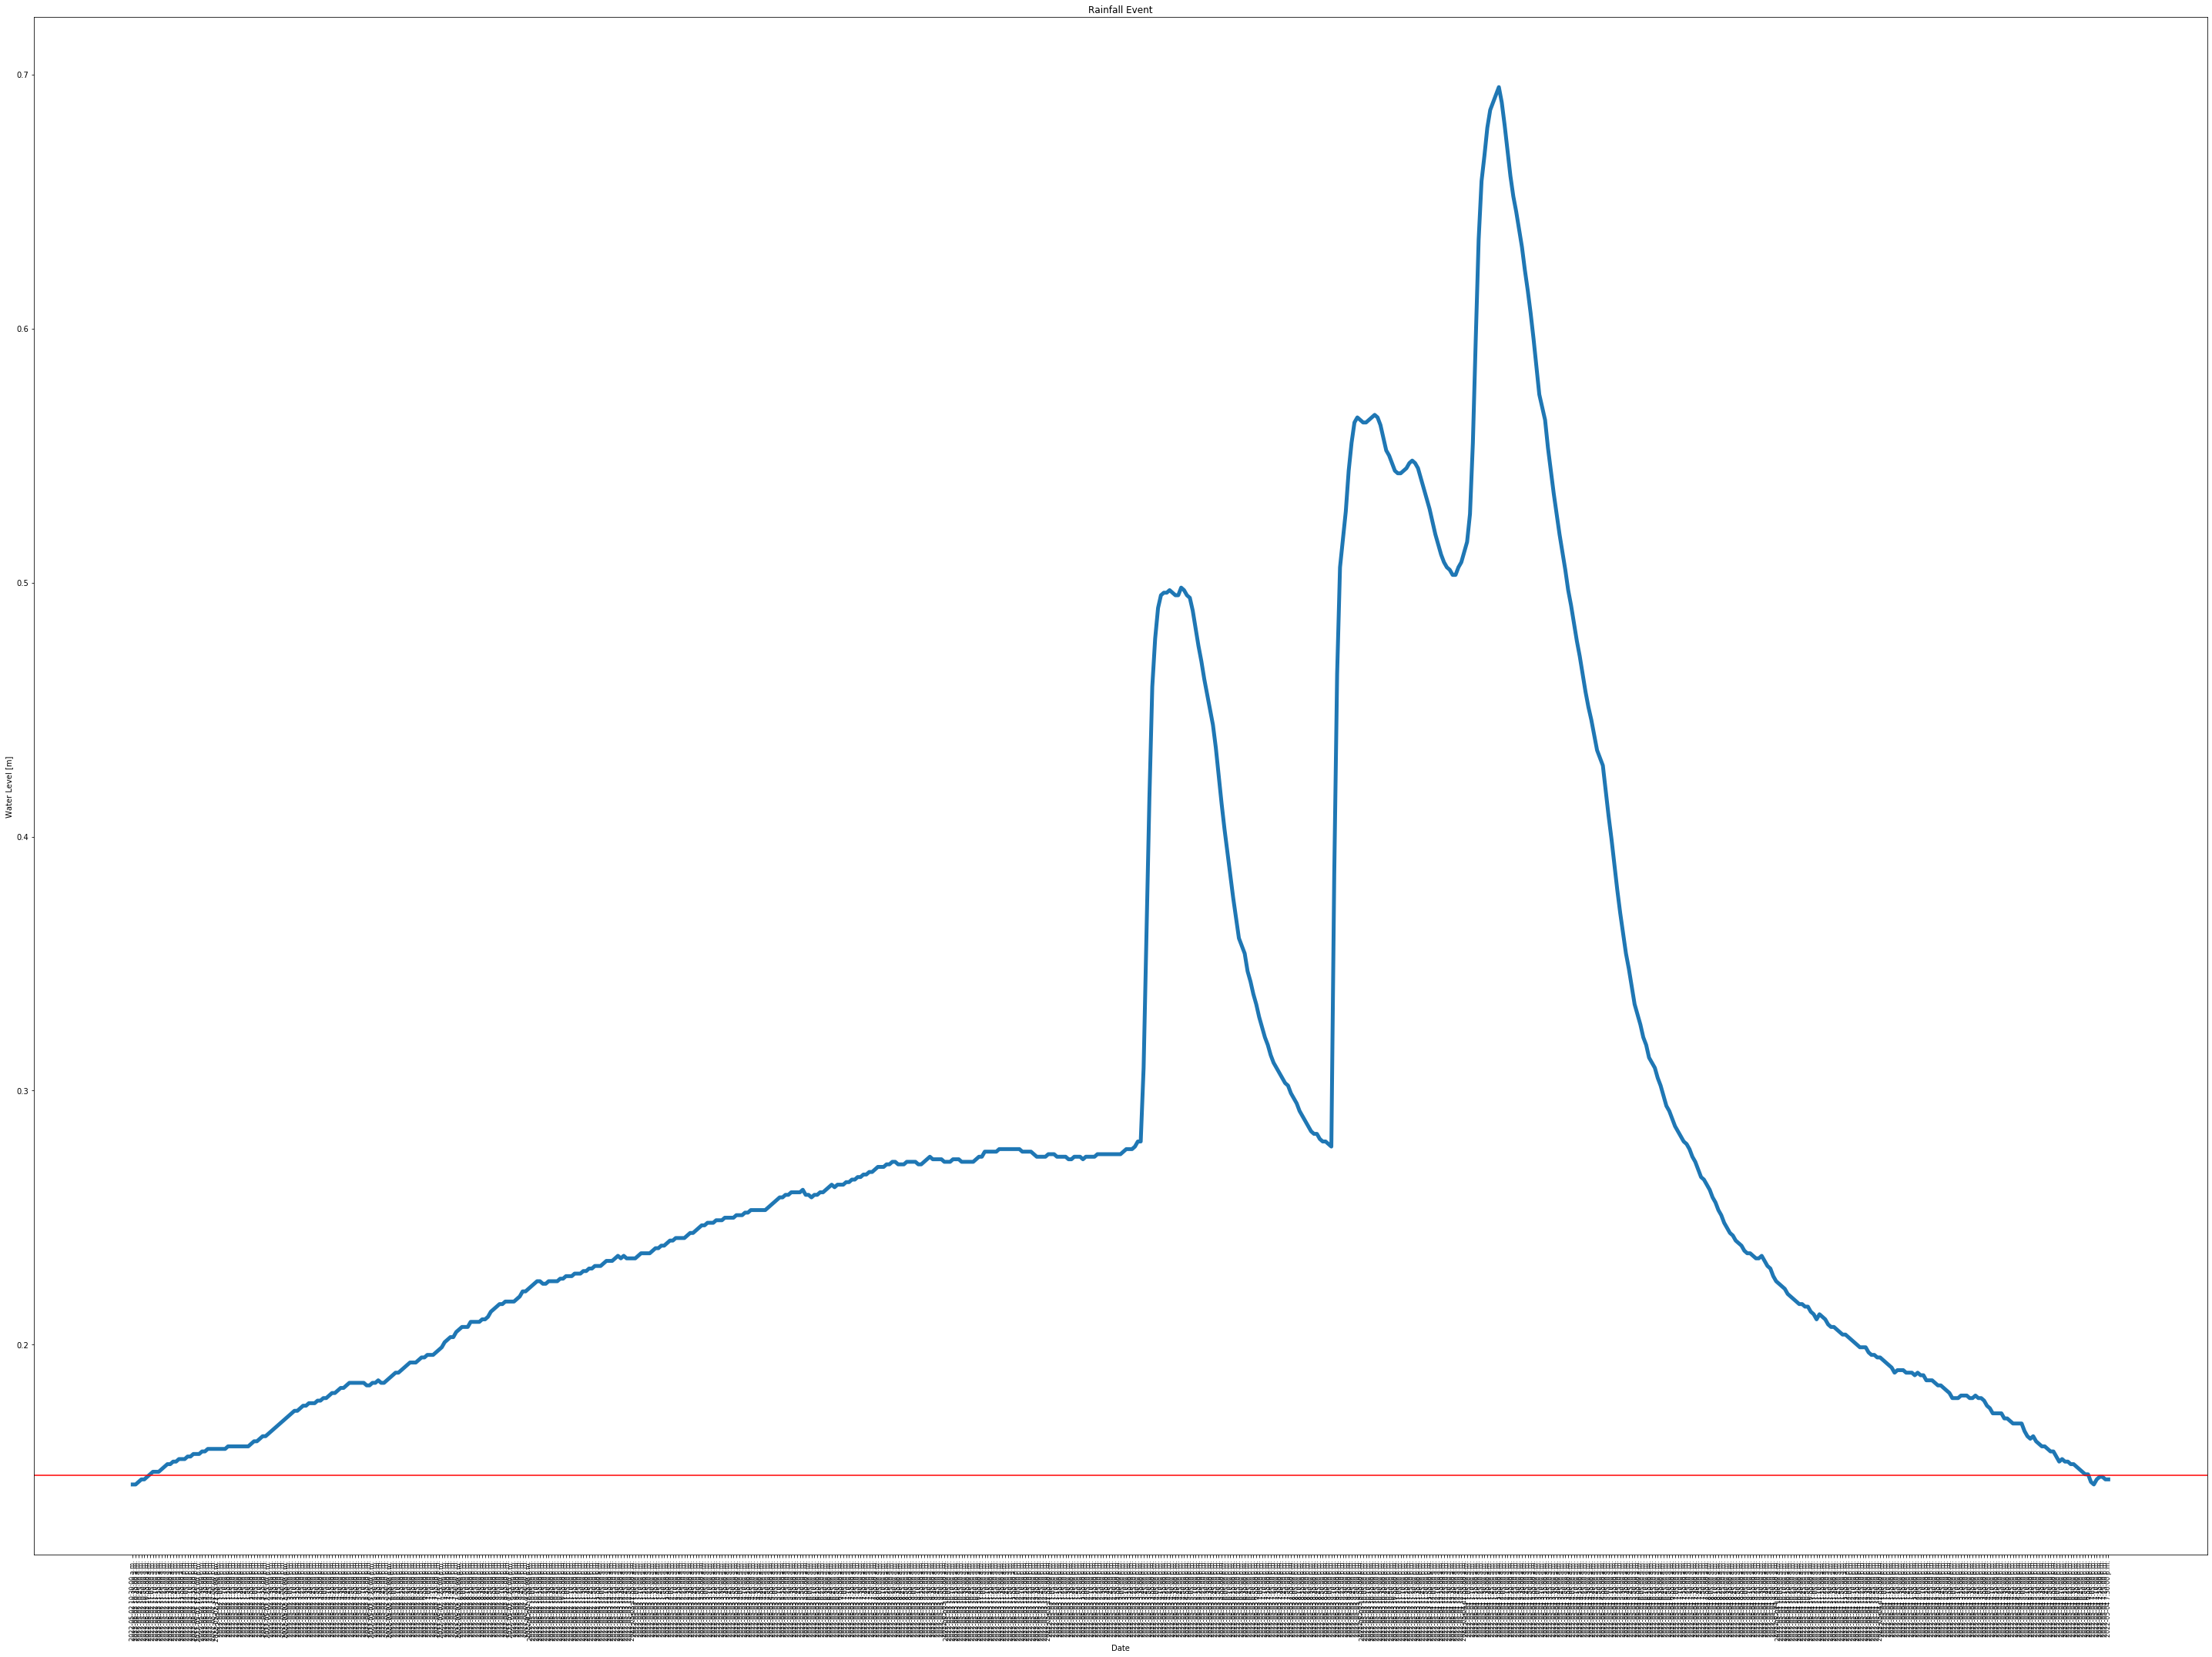

In [28]:
# Rainfall event
buffer=6
index=1
X=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"])

plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=5)
plt.axhline(y=tolA, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

In [30]:
buffer=6
index=2
sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"].describe()

count    253.000000
mean       0.464237
std        0.252375
min        0.066000
25%        0.185000
50%        0.529000
75%        0.688000
max        0.887000
Name:  Water Level [m], dtype: float64

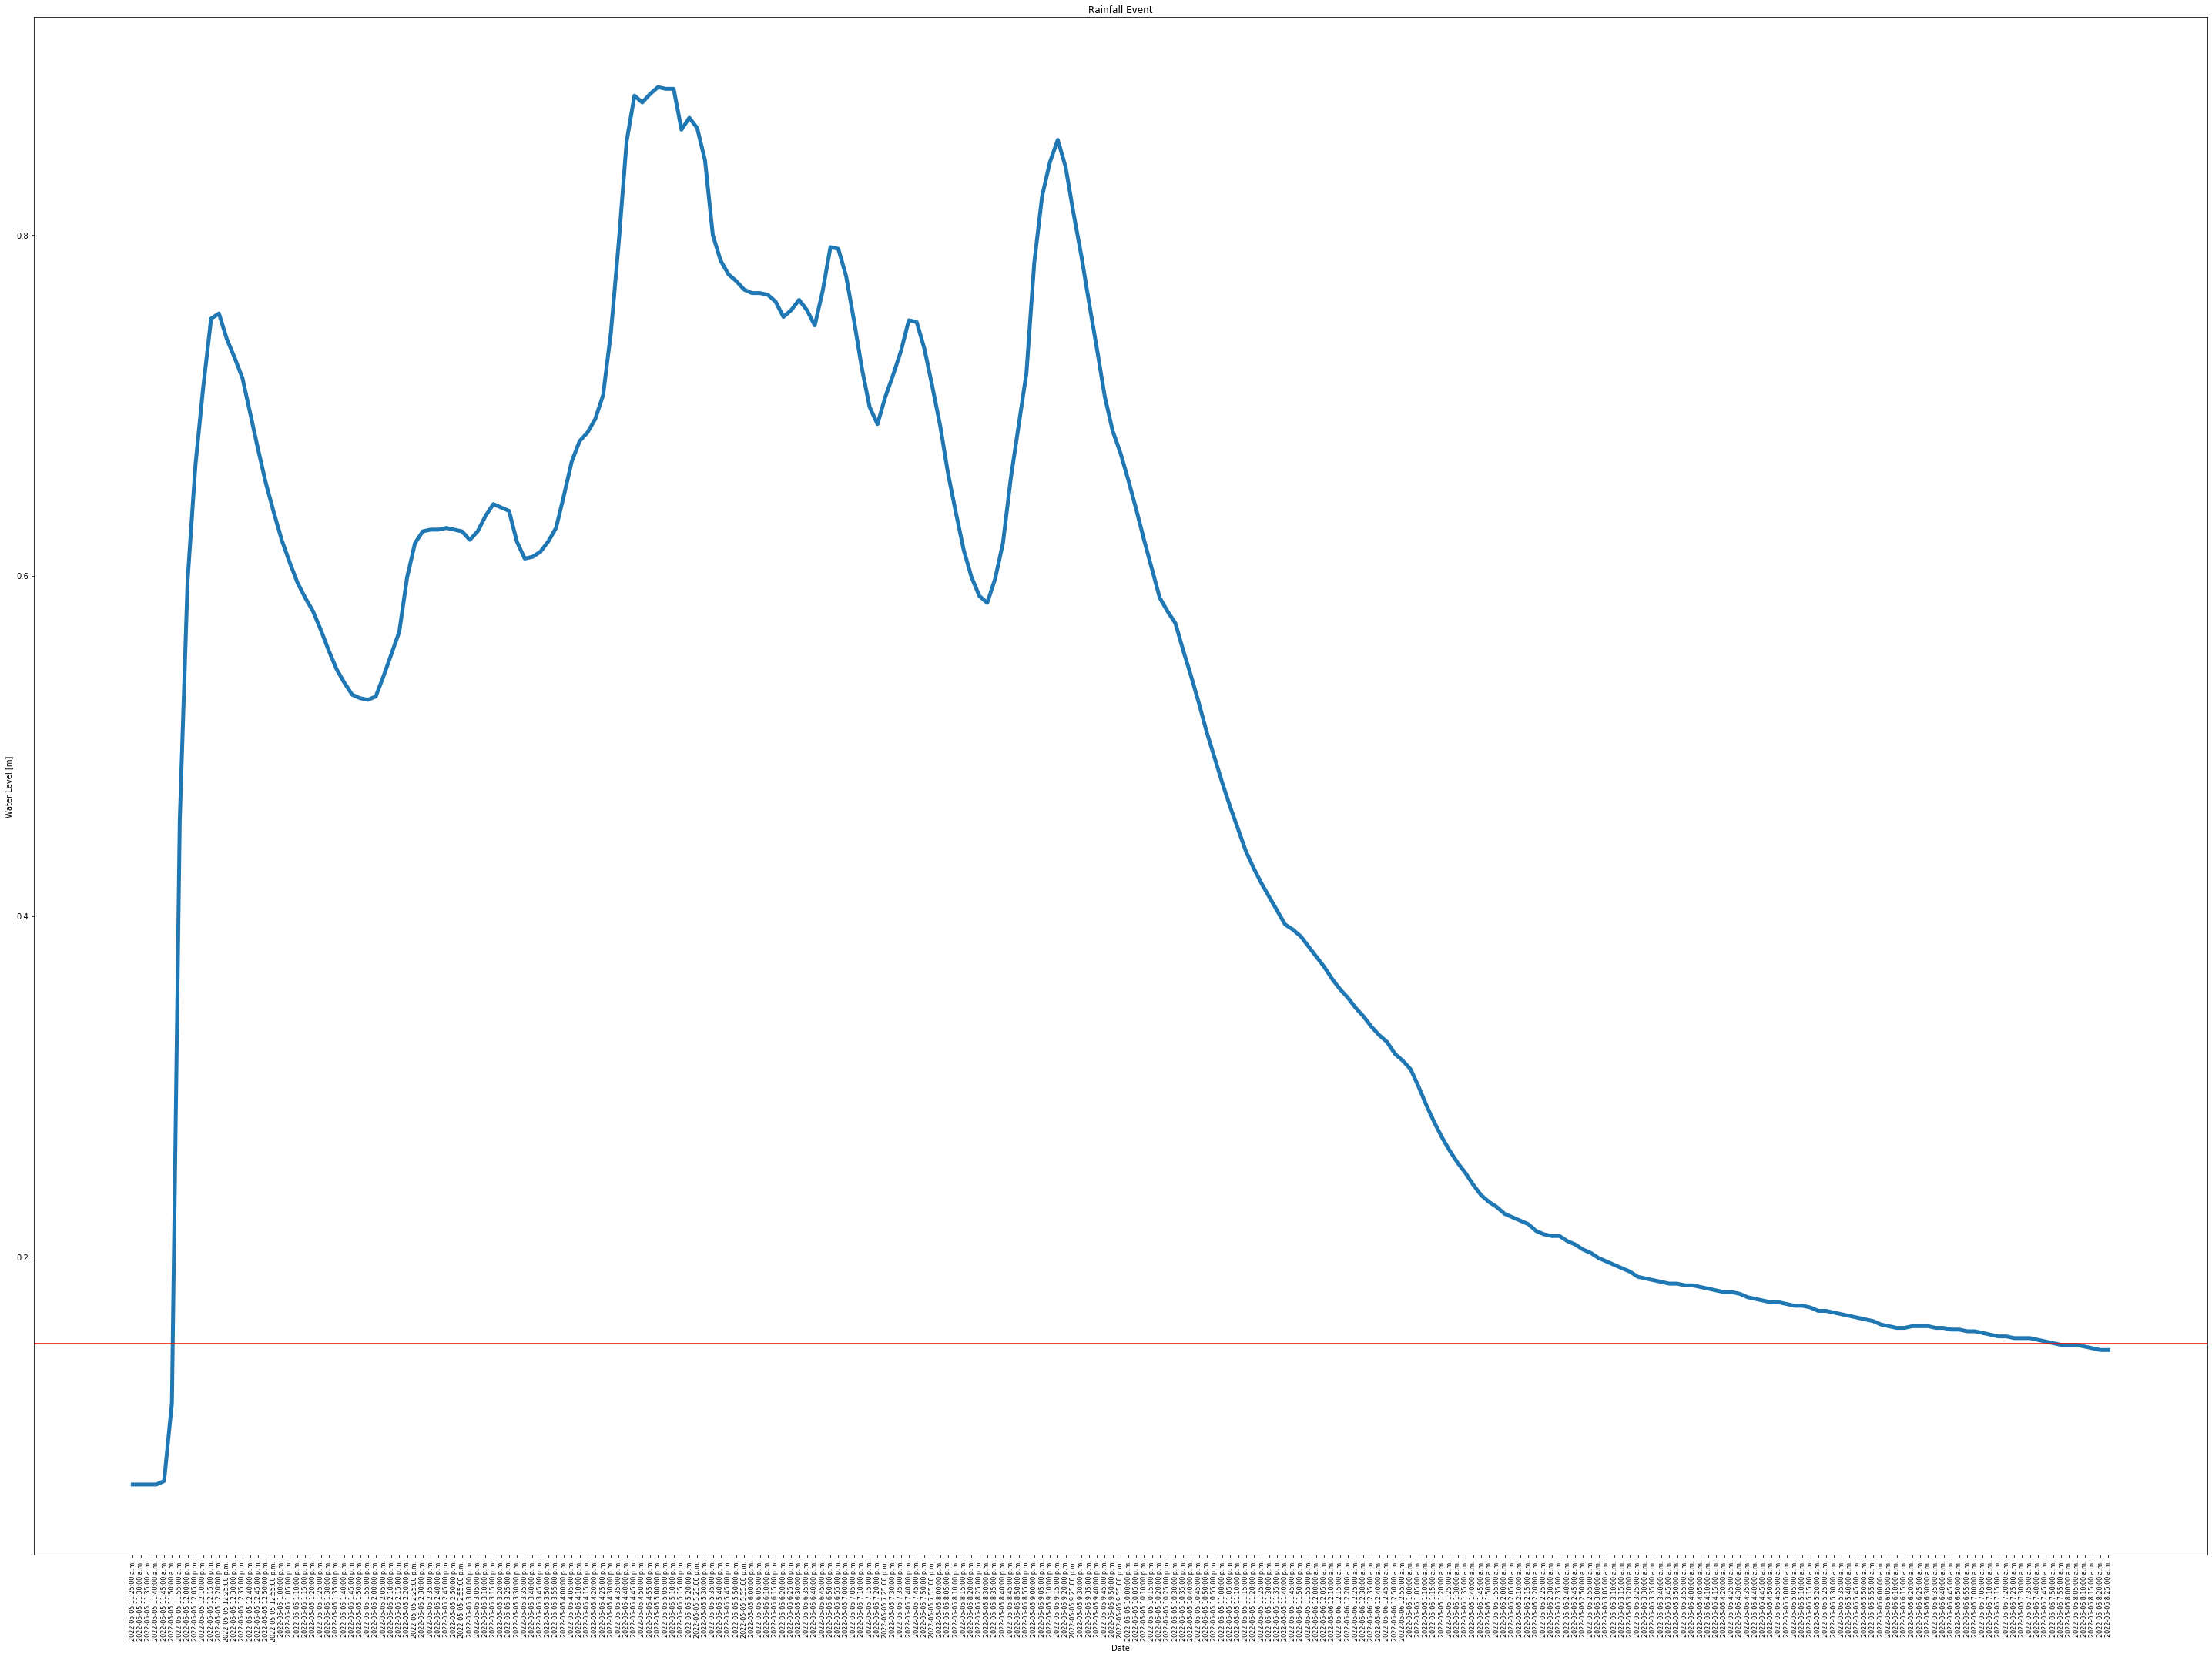

In [29]:
# Rainfall event
buffer=6
index=2
X=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"])

plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=5)
plt.axhline(y=tolA, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

In [42]:
buffer=6
index=0
a=sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"].describe()
a

count    21653.000000
mean         0.451833
std          0.248315
min          0.144000
25%          0.259000
50%          0.422000
75%          0.512000
max          1.428000
Name:  Water Level [m], dtype: float64

In [50]:
tolA=a[5]
start_timeA,end_timeA,start_indexA,end_indexA,rf_durationA=IdentifyRainfall(sADF.loc[0:21646],tolA)
rf_eventA=pd.DataFrame({"Rainfall_start_time":start_timeA,"Rainfall_end_time":end_timeA,"Rainfall_start_index":start_indexA,"Rainfall_end_index":end_indexA,"Rainfall_duration":rf_durationA})
rf_eventA

,Rainfall_start_time,Rainfall_end_time,Rainfall_start_index,Rainfall_end_index,Rainfall_duration
0,2022-02-19 11:40:00 a.m.,2022-02-19 10:20:00 p.m.,1087,1215,128
1,2022-02-21 4:00:00 a.m.,2022-02-21 6:50:00 a.m.,1571,1605,34
2,2022-02-26 5:35:00 p.m.,2022-02-27 11:45:00 a.m.,3174,3392,218
3,2022-02-27 6:30:00 p.m.,2022-02-28 11:40:00 p.m.,3473,3823,350
4,2022-03-01 4:30:00 p.m.,2022-03-03 10:20:00 a.m.,4025,4527,502
5,2022-03-11 9:05:00 p.m.,2022-03-12 1:50:00 p.m.,6960,7161,201
6,2022-03-13 7:05:00 a.m.,2022-03-16 3:40:00 a.m.,7356,8179,823
7,2022-03-17 7:05:00 a.m.,2022-03-20 3:00:00 a.m.,8508,9323,815
8,2022-03-20 2:25:00 p.m.,2022-03-25 6:20:00 p.m.,9460,10947,1487
9,2022-03-26 5:10:00 a.m.,2022-04-04 5:25:00 a.m.,11077,13672,2595


In [55]:
buffer=6
index=9
sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"].describe()

count    2608.000000
mean        0.557649
std         0.158784
min         0.375000
25%         0.497000
50%         0.508000
75%         0.524000
max         1.221000
Name:  Water Level [m], dtype: float64

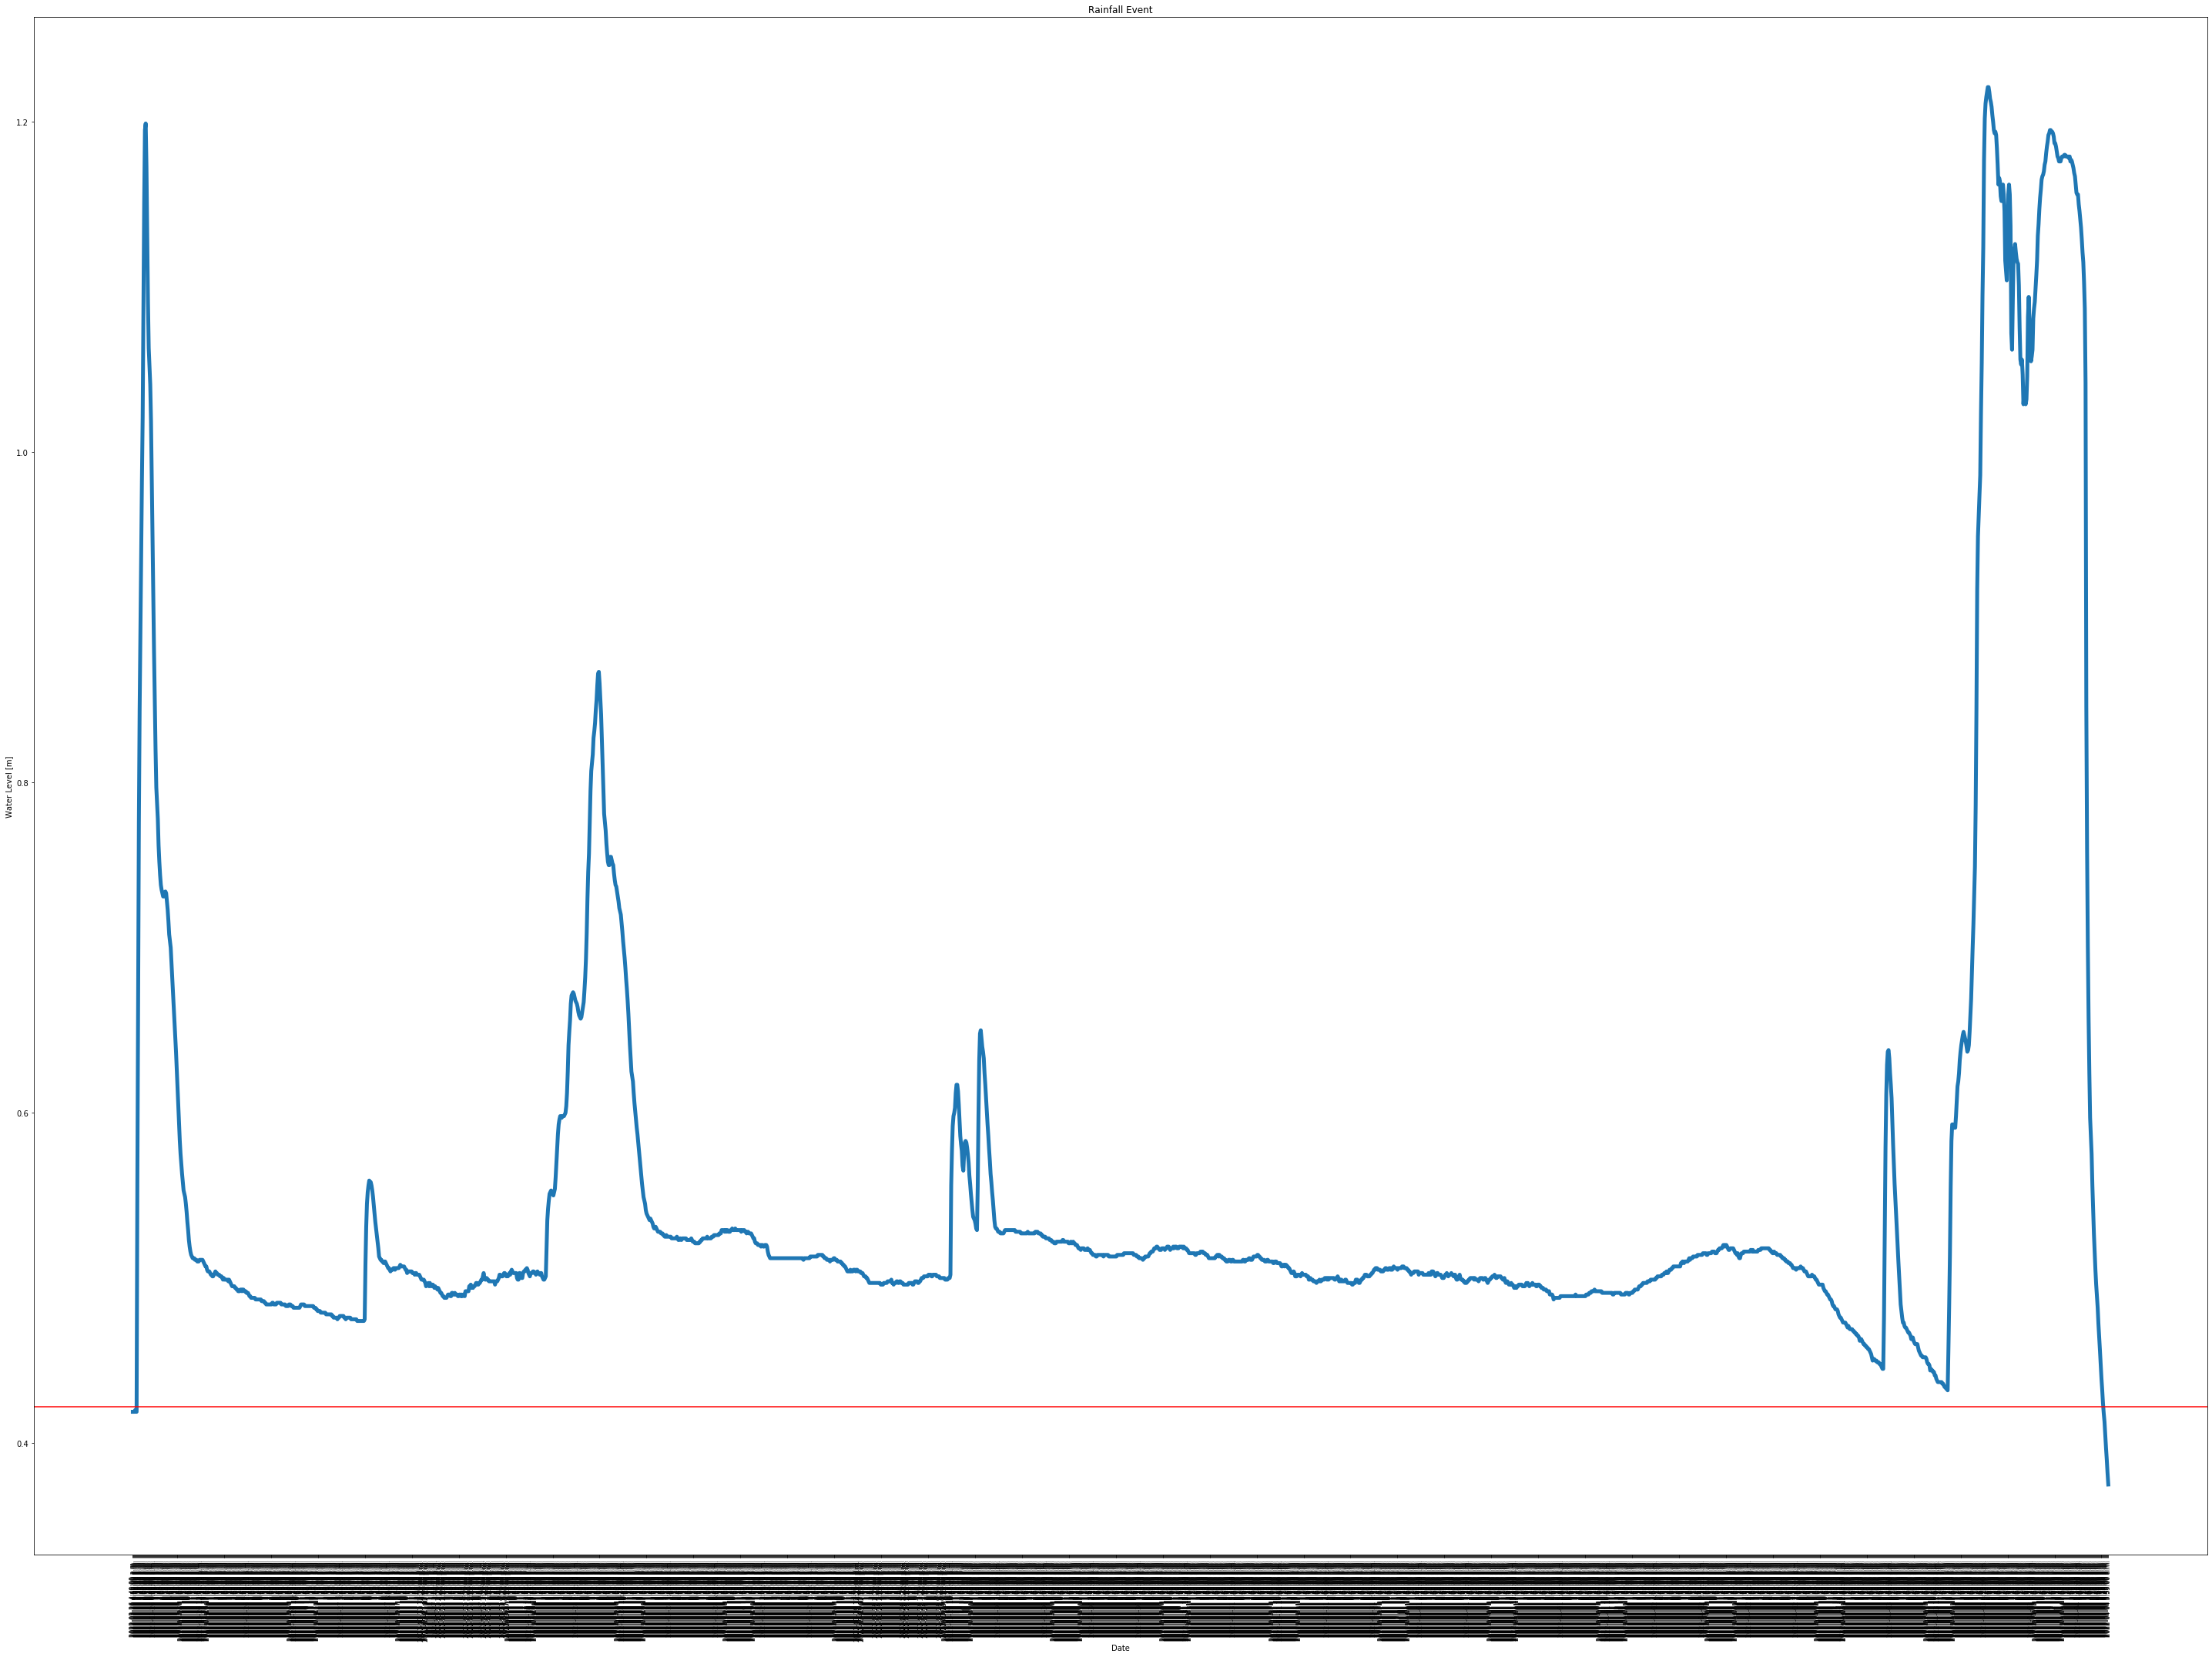

In [56]:
# Rainfall event
buffer=6
index=9
X=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sADF.loc[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer][" Water Level [m]"])

plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=5)
plt.axhline(y=tolA, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

In [57]:
start_timeB,end_timeB,start_indexB,end_indexB,rf_durationB=IdentifyRainfall(sBDF,tolB)
rf_eventB=pd.DataFrame({"Rainfall_start_time":start_timeB,"Rainfall_end_time":end_timeB,"Rainfall_start_index":start_indexB,"Rainfall_end_index":end_indexB,"Rainfall_duration":rf_durationB})
rf_eventB

,Rainfall_start_time,Rainfall_end_time,Rainfall_start_index,Rainfall_end_index,Rainfall_duration
0,2022-02-26 7:30:00 p.m.,2022-03-07 5:35:00 p.m.,3198,5767,2569
1,2022-03-12 2:50:00 a.m.,2022-04-02 5:00:00 a.m.,7030,13092,6062
2,2022-04-03 4:05:00 p.m.,2022-04-10 10:20:00 a.m.,13513,15460,1947
3,2022-04-12 11:00:00 a.m.,2022-04-17 6:35:00 a.m.,16044,17431,1387
4,2022-04-18 5:55:00 a.m.,2022-04-28 10:25:00 p.m.,17711,20789,3078
5,2022-04-30 11:05:00 a.m.,2022-05-02 2:50:00 p.m.,21229,21850,621
6,2022-05-05 11:45:00 a.m.,2022-05-10 11:45:00 a.m.,22677,24117,1440
7,2022-05-12 2:05:00 a.m.,2022-05-12 2:15:00 a.m.,24577,24579,2
8,2022-05-12 1:30:00 p.m.,2022-05-22 8:25:00 a.m.,24714,27533,2819
9,2022-05-26 10:50:00 p.m.,2022-05-30 7:20:00 p.m.,28858,29968,1110


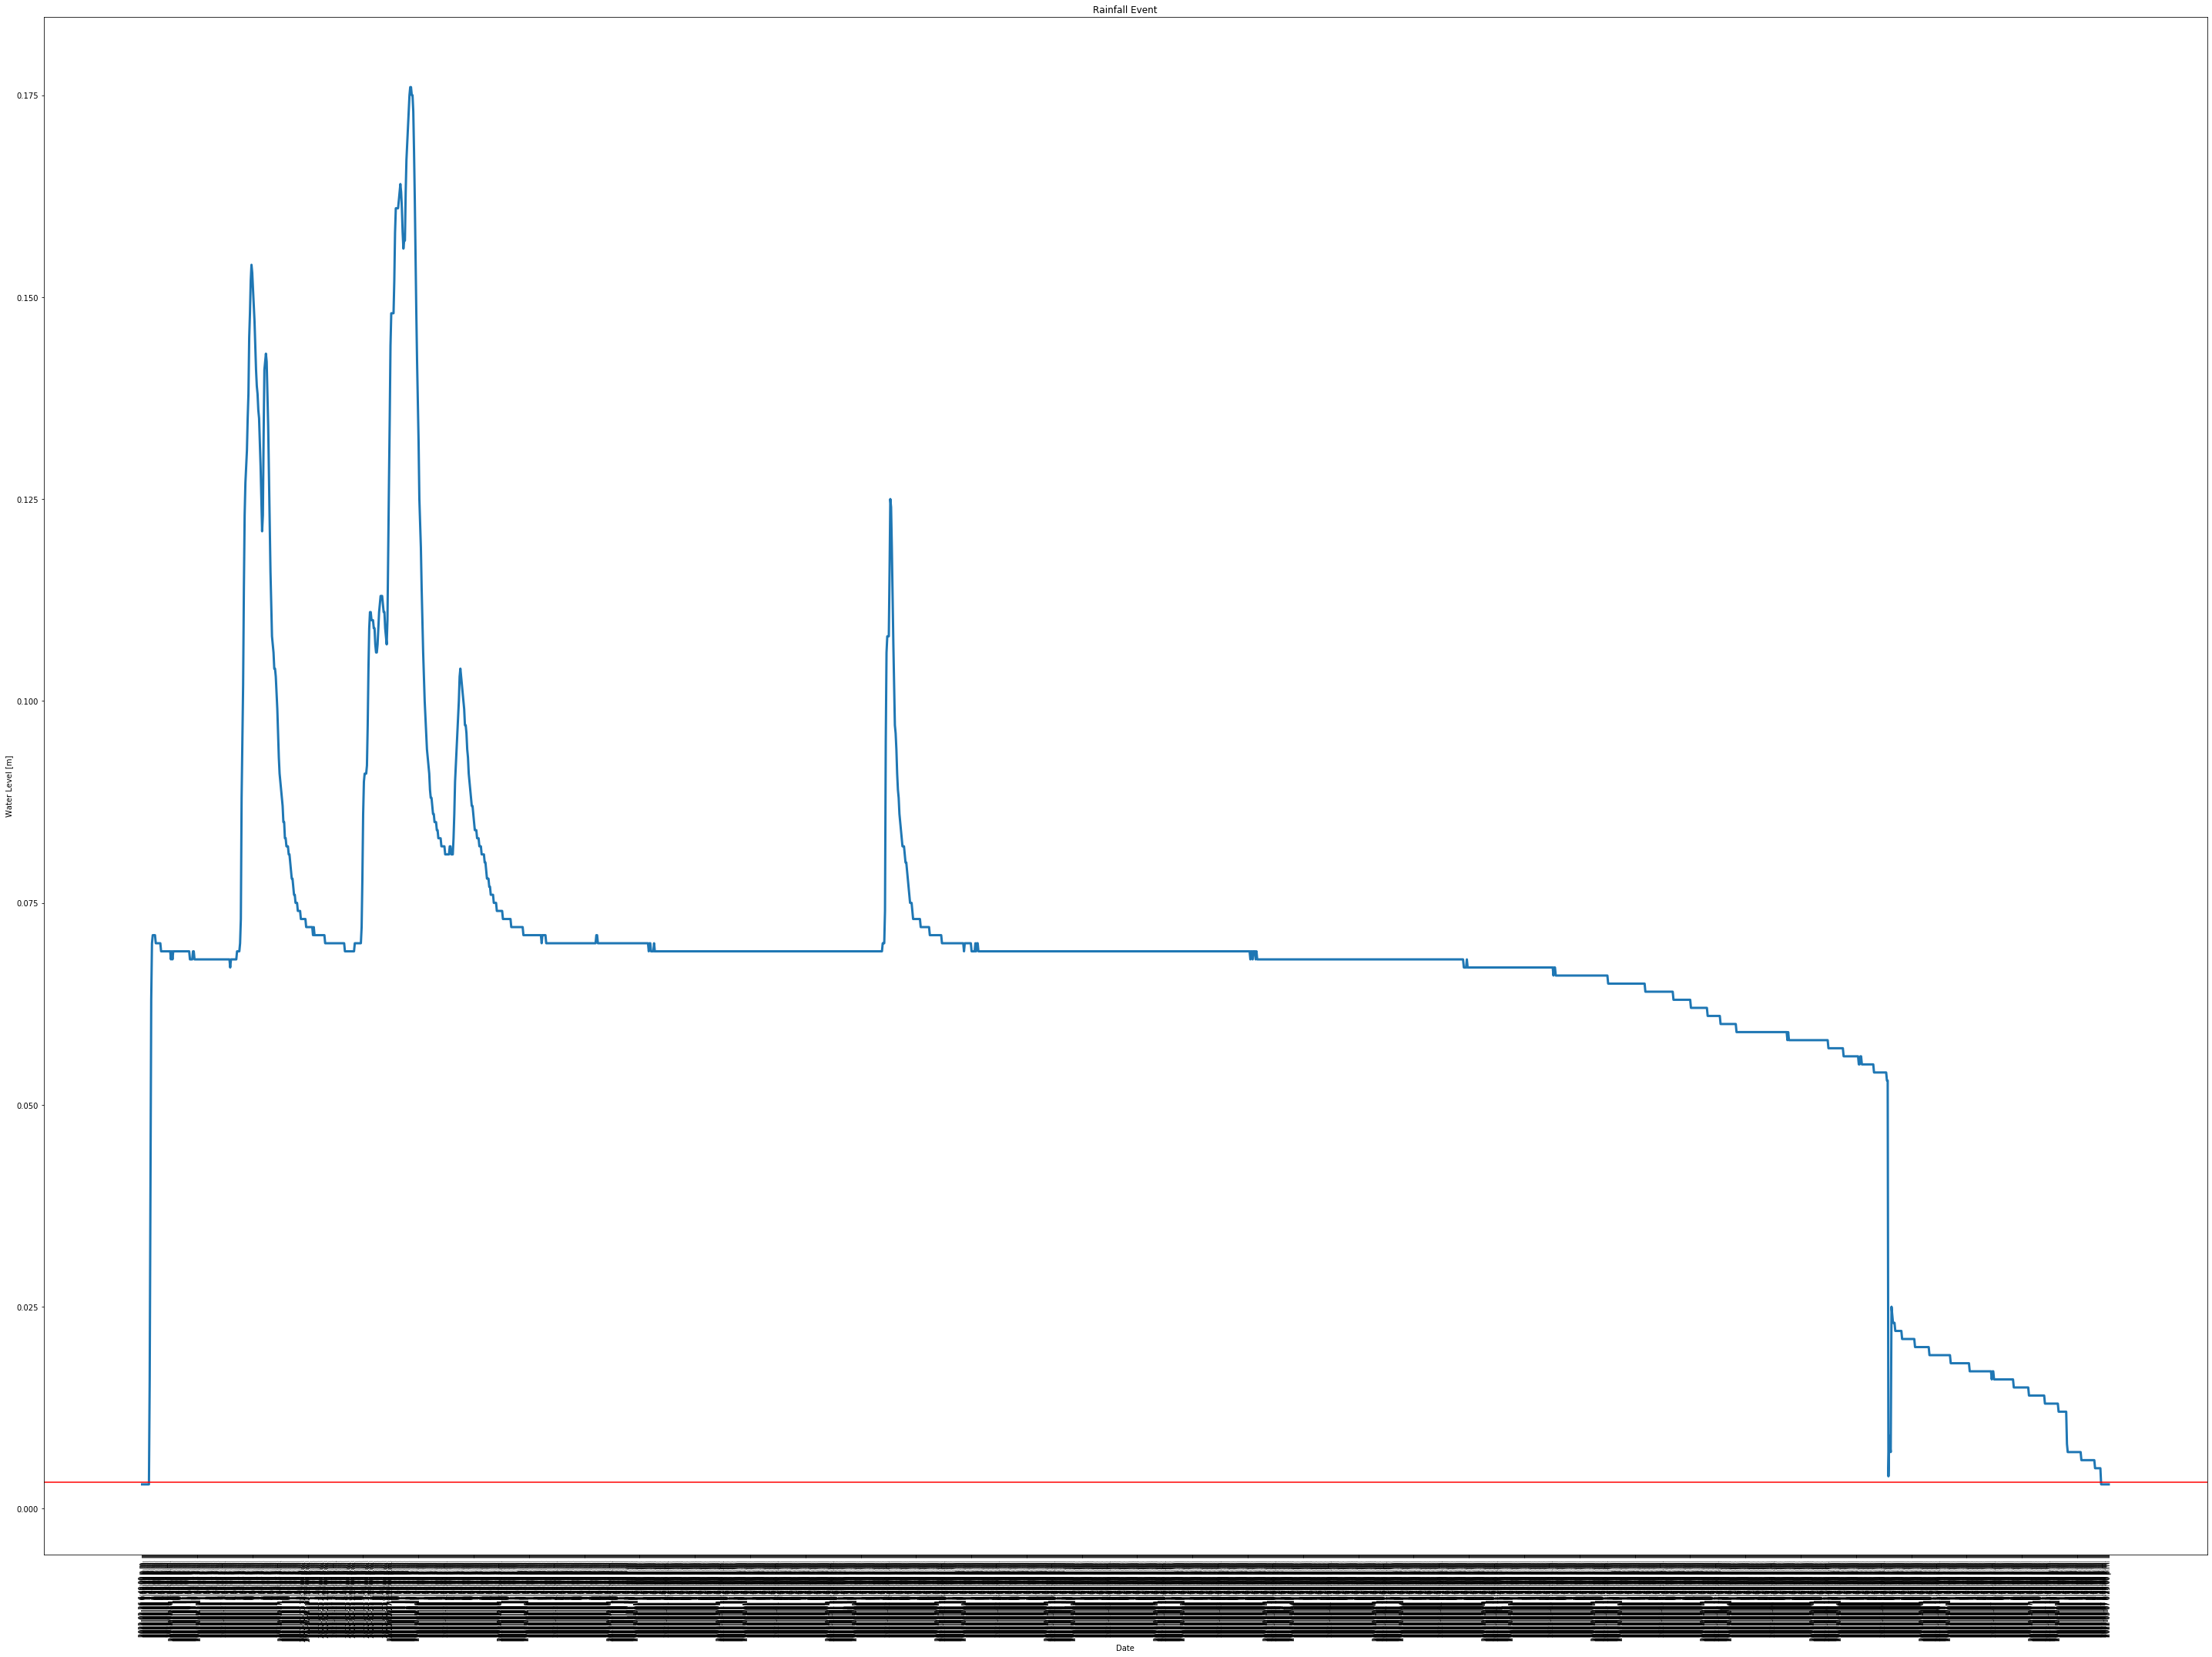

In [287]:
# Rainfall event
buffer=10
index=0
X=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer][" Water Level [m]"])


plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=3)
plt.axhline(y=tolB, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

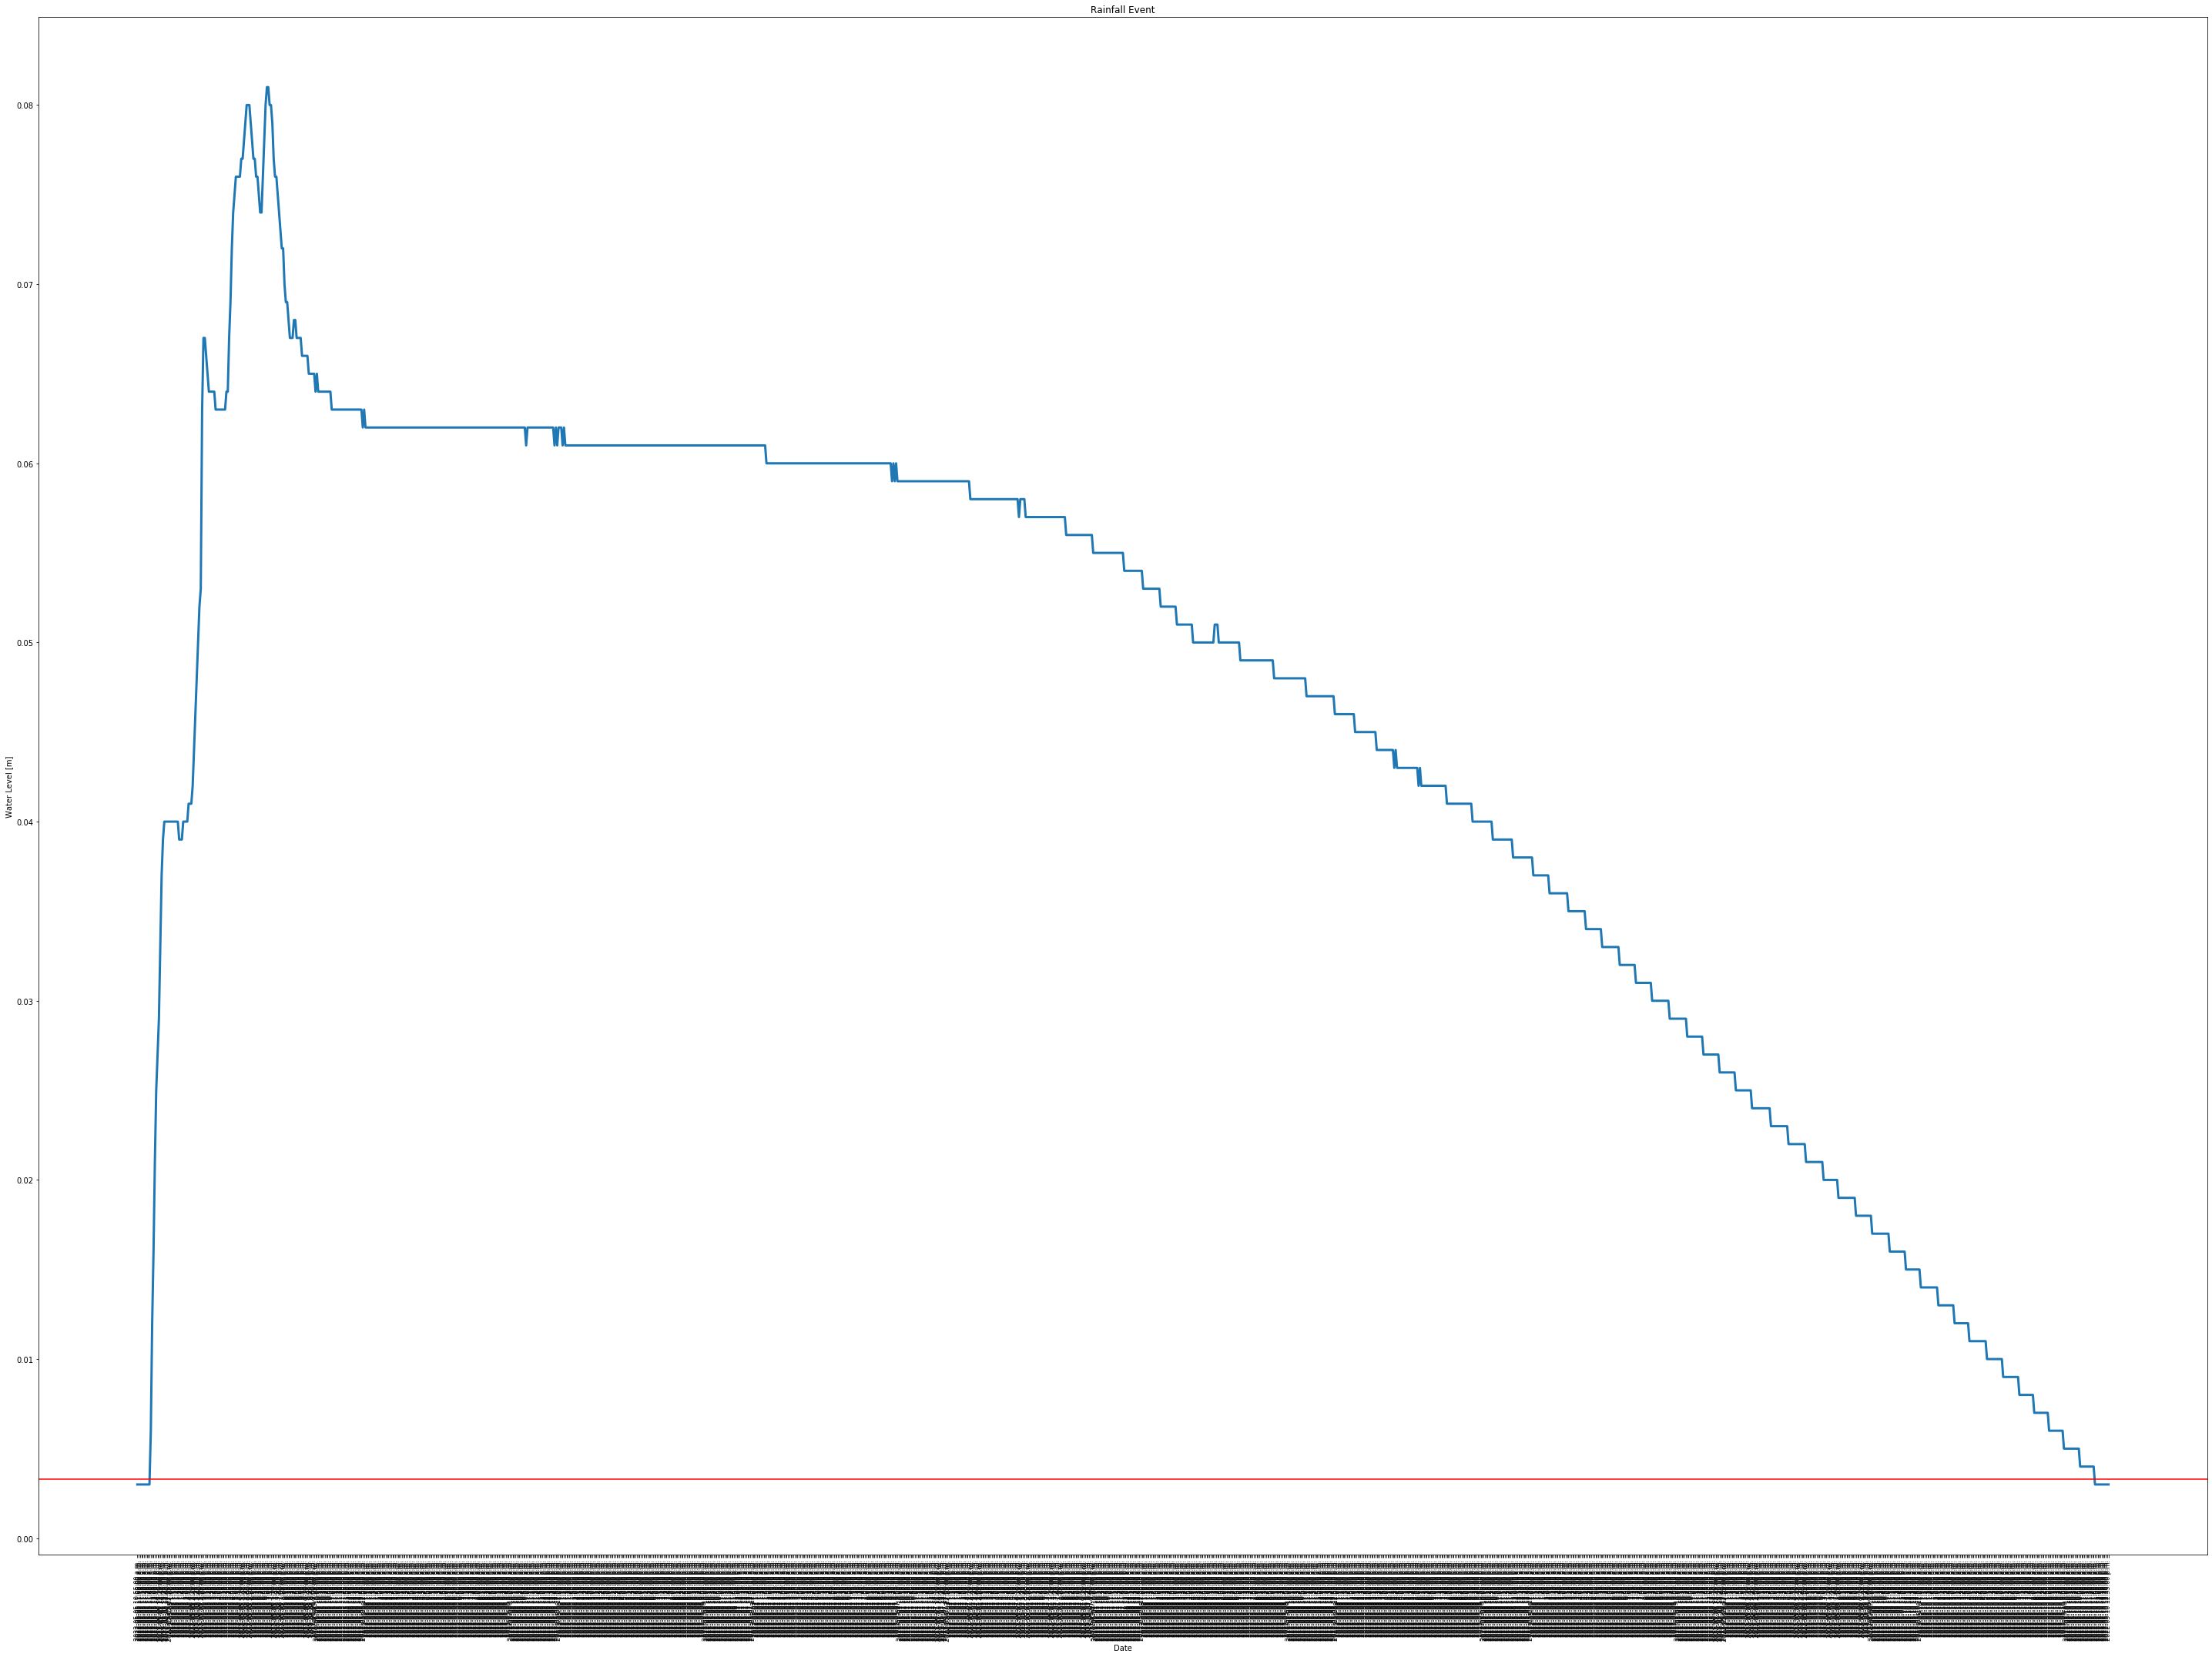

In [286]:
# Rainfall event
buffer=10
index=6
X=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer][" Water Level [m]"])


plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=3)
plt.axhline(y=tolB, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

In [59]:
start_timeB,end_timeB,start_indexB,end_indexB,rf_durationB=IdentifyRainfall(sBDF,0.075)
rf_eventB=pd.DataFrame({"Rainfall_start_time":start_timeB,"Rainfall_end_time":end_timeB,"Rainfall_start_index":start_indexB,"Rainfall_end_index":end_indexB,"Rainfall_duration":rf_durationB})
rf_eventB

,Rainfall_start_time,Rainfall_end_time,Rainfall_start_index,Rainfall_end_index,Rainfall_duration
0,2022-02-27 5:35:00 a.m.,2022-02-27 11:45:00 a.m.,3319,3393,74
1,2022-02-27 6:50:00 p.m.,2022-02-28 9:35:00 a.m.,3478,3655,177
2,2022-03-02 4:15:00 a.m.,2022-03-02 7:10:00 a.m.,4167,4202,35
3,2022-03-12 6:00:00 a.m.,2022-03-12 6:10:00 a.m.,7068,7070,2
4,2022-03-13 10:50:00 p.m.,2022-03-15 6:20:00 a.m.,7546,7924,378
5,2022-03-17 9:05:00 a.m.,2022-03-17 4:10:00 p.m.,8533,8618,85
6,2022-03-20 10:30:00 p.m.,2022-03-21 7:20:00 a.m.,9558,9664,106
7,2022-03-22 2:15:00 a.m.,2022-03-22 4:30:00 a.m.,9891,9918,27
8,2022-03-23 12:00:00 p.m.,2022-03-23 12:10:00 p.m.,10296,10298,2
9,2022-03-26 6:25:00 a.m.,2022-03-26 7:10:00 a.m.,11093,11102,9


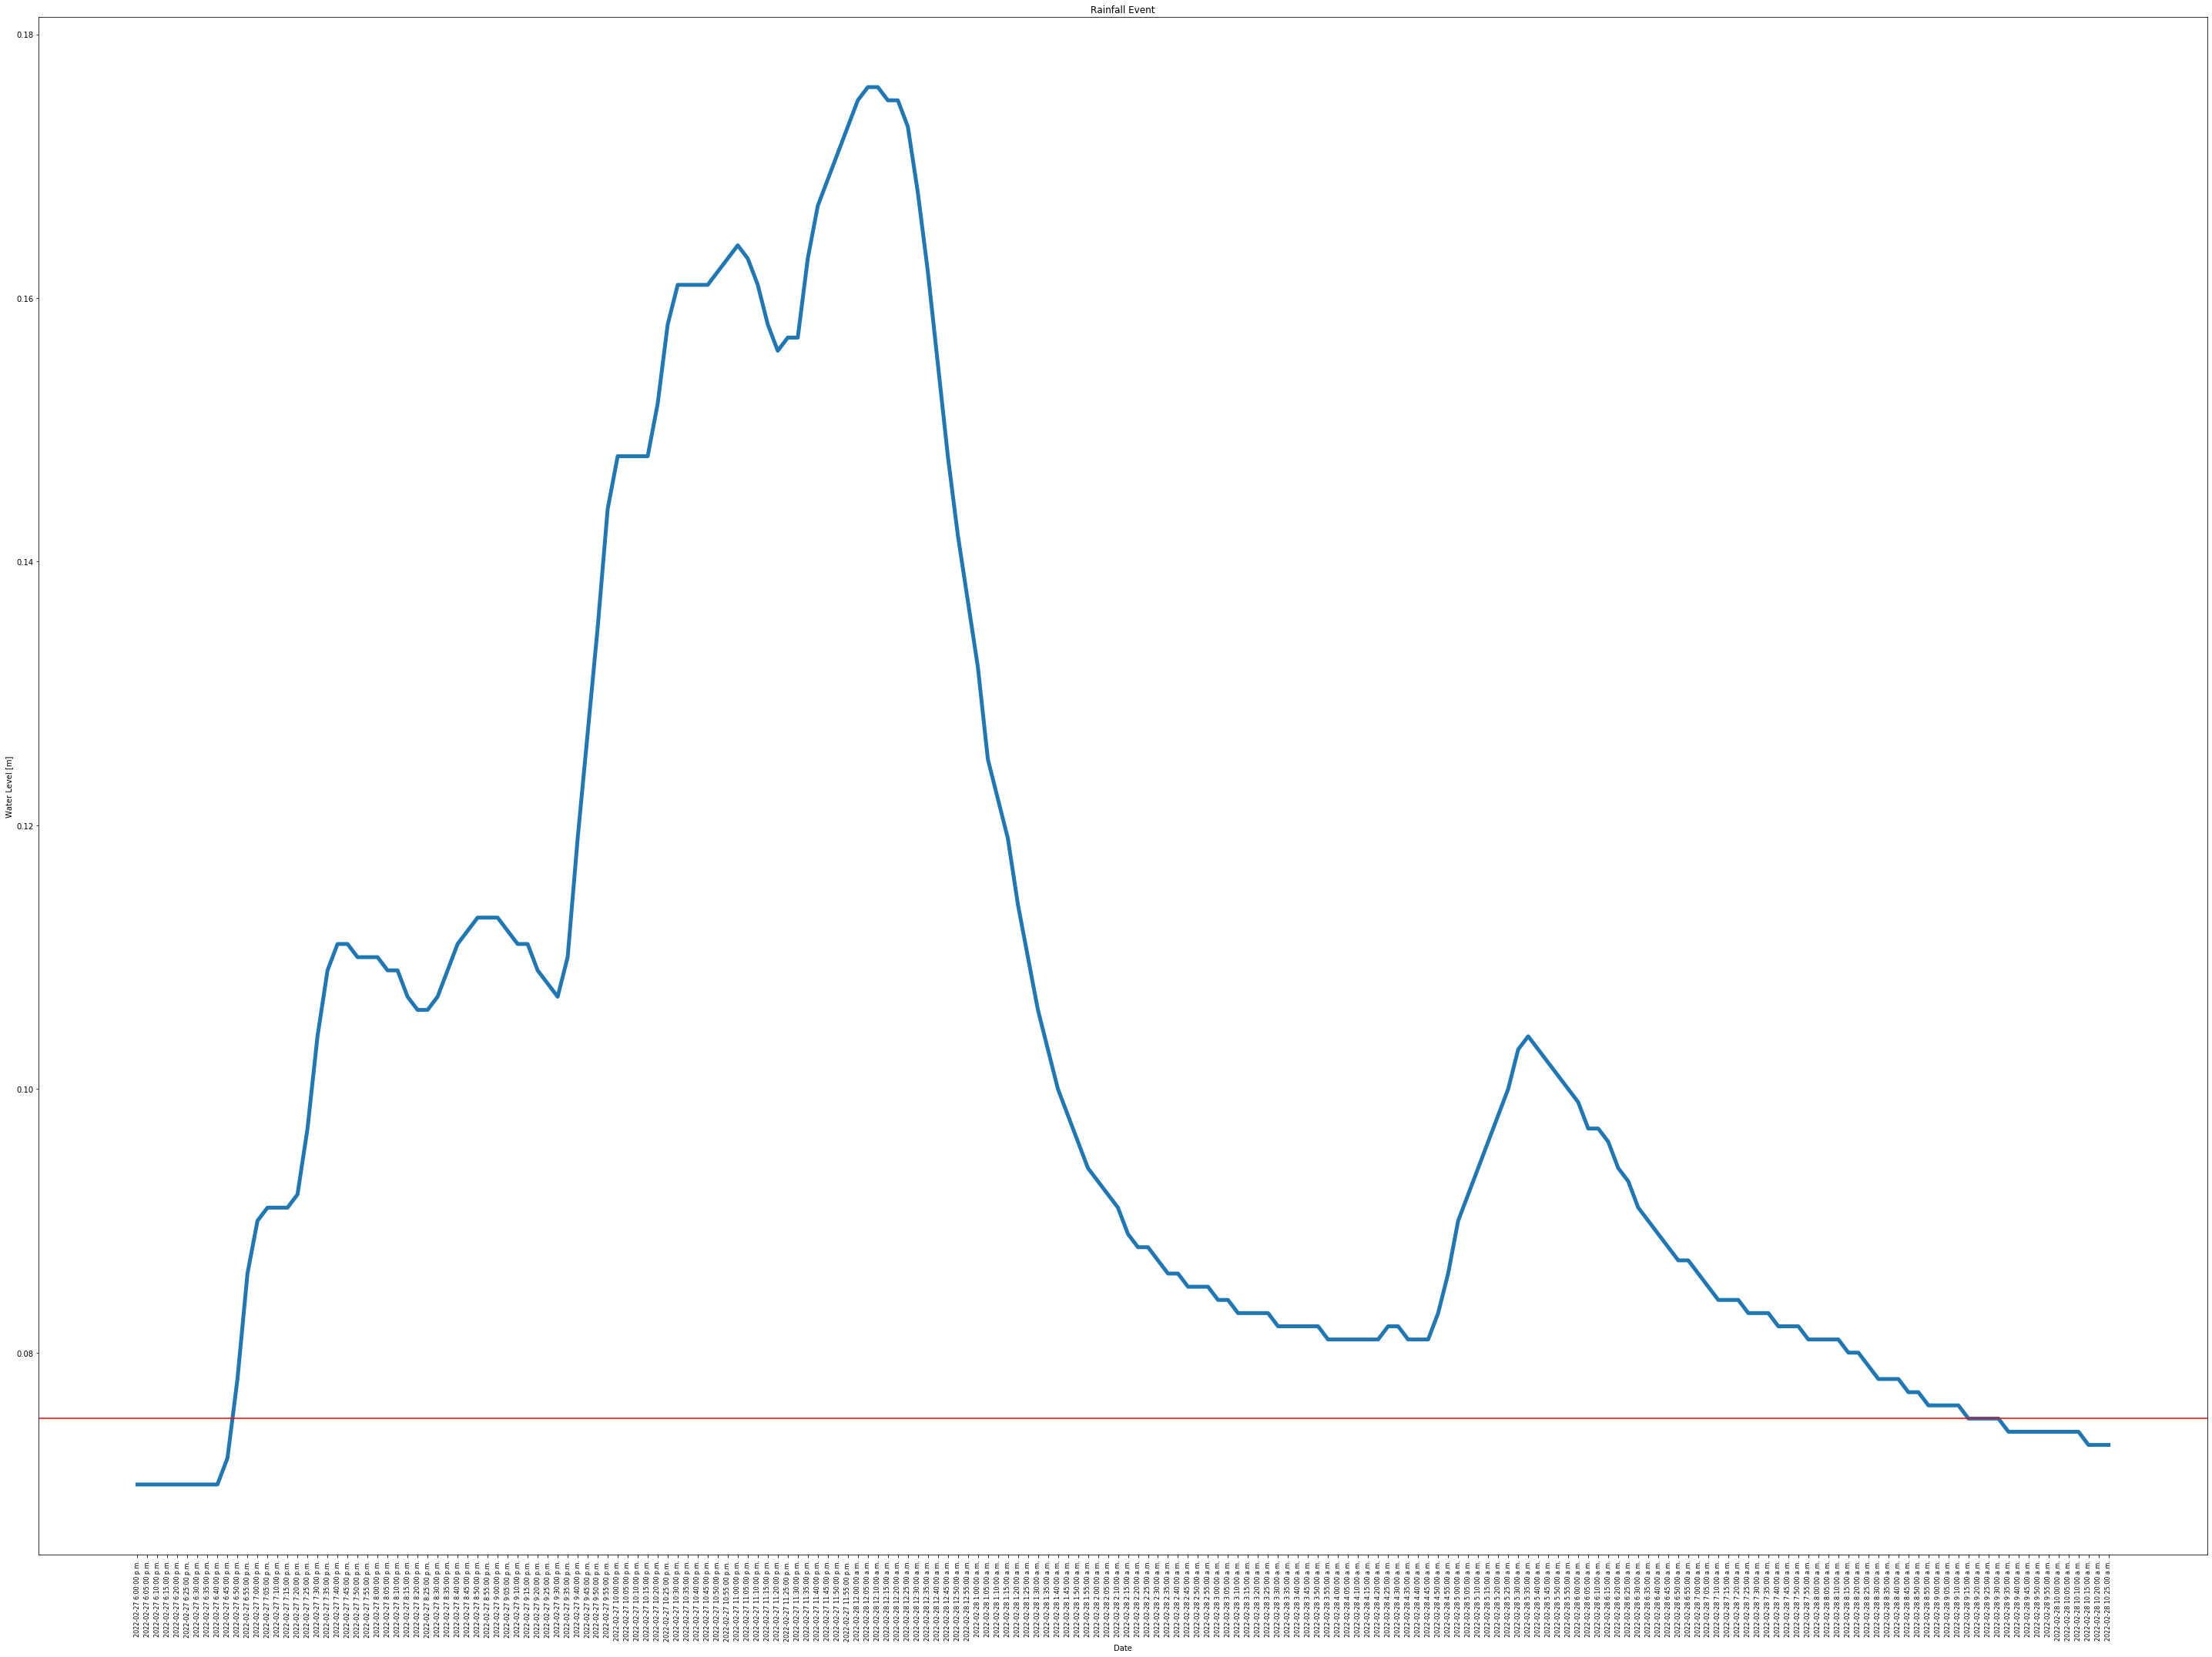

In [61]:
# Rainfall event
buffer=10
index=1
X=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer][" Water Level [m]"])

plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=5)
plt.axhline(y=0.075, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()

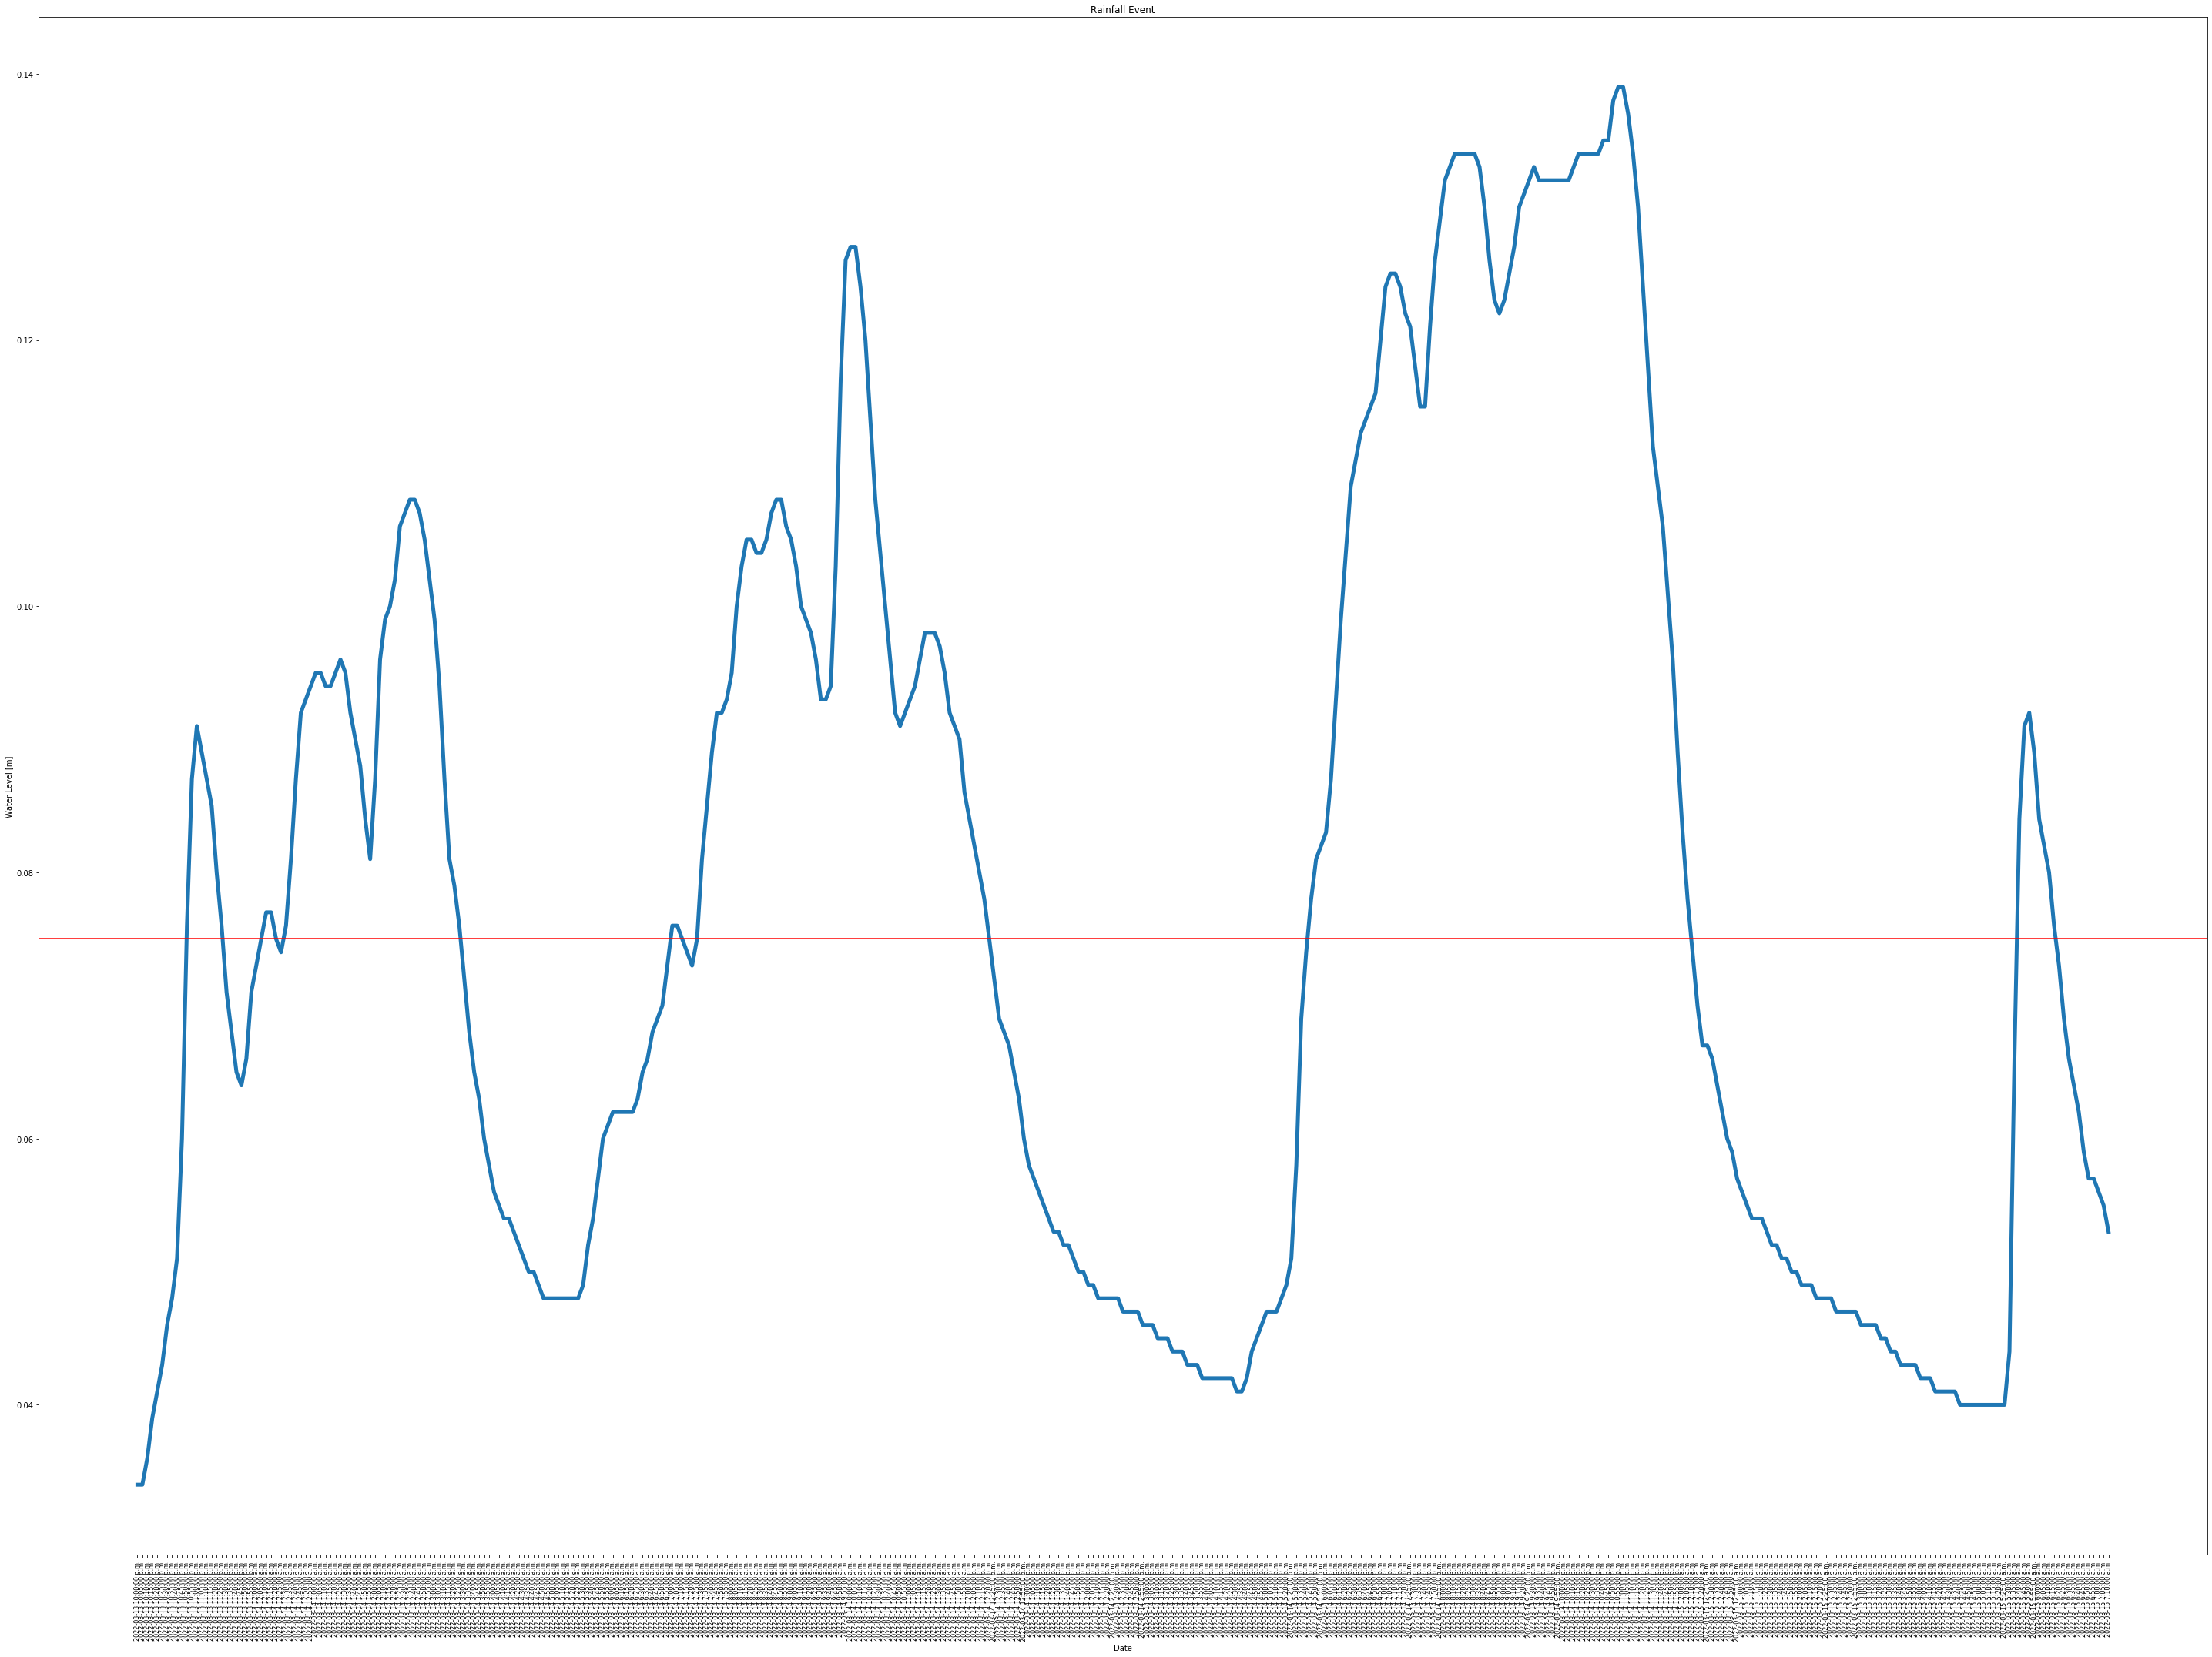

In [62]:
# Rainfall event
buffer=10
index=4
X=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer]["Timestamp"])
Y=list(sBDF.loc[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer][" Water Level [m]"])

plt.figure(figsize=(40, 30))
plt.plot(X,Y,linewidth=5)
plt.axhline(y=0.075, color='r', linestyle='-')
plt.title('Rainfall Event')
plt.xlabel('Date')
plt.ylabel('Water Level [m]')
plt.tick_params(axis='x',labelsize=8,rotation=90)
plt.tight_layout()
plt.show()